In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
# Load your dataset (replace with your filename if needed)
data = pd.read_csv(r"data\IRIS.csv")
df = data.copy() 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum() #below you can see that no column in this table has null values.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris_data = df.copy()

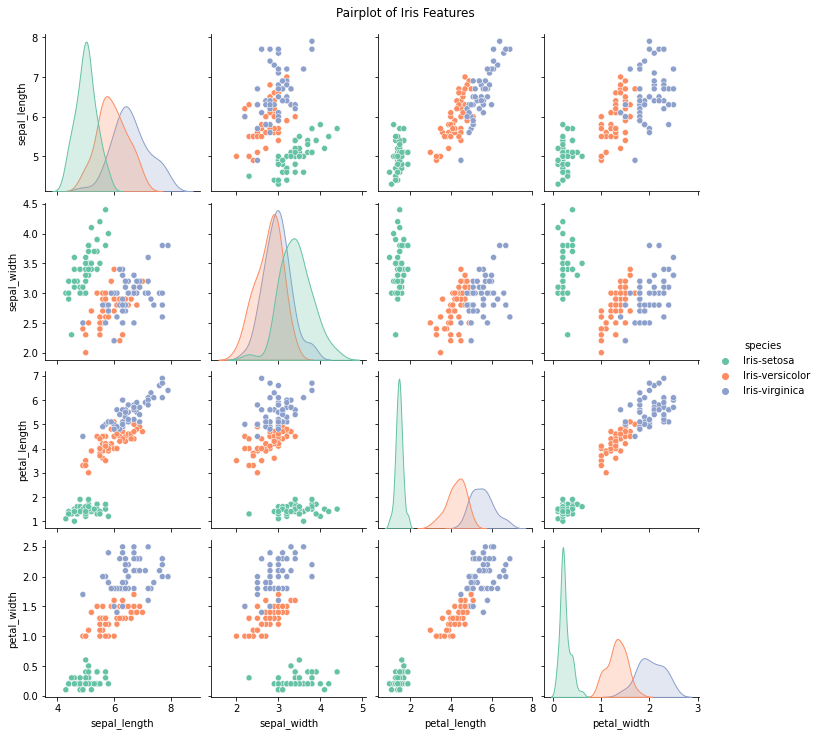

In [8]:
sns.pairplot(iris_data, hue='species', palette='Set2')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [10]:
# Step 3: Split the data into features and target
X = iris_data.drop('species', axis=1) #features -> the ones that determine the species
y = iris_data['species'] #target -> species names



# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #splitting the dataset into training and testing dataset

In [12]:
# Step 5: Initialize and train Decision Tree model
clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
clf.fit(X_train, y_train) #we are fitting/loading the training set to the model for the model to train.

# Step 6: Predict on test data
y_pred = clf.predict(X_test) 

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 97.78%
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



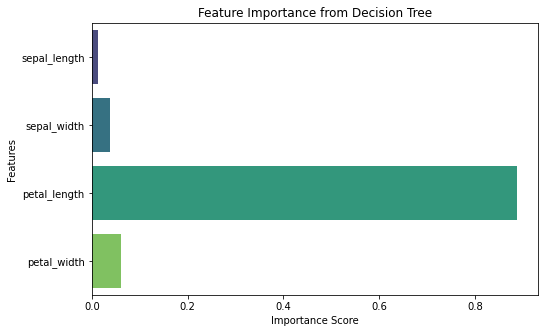

In [13]:
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()